We run the probe(multiclass logistic regression over senses) on all words we have embeddings for.

In [18]:
from core.metrics import *
from core.semcor_bert_pipeline import get_pos
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Prep & Model Training

In [3]:
df = pd.read_csv('../data/randscore_entropy.csv') 
#From a previous analysis, contains which words we have embeddings for
df['pos'] = df['Lemma'].apply(get_pos)
df = df[df['pos'].isin(['n', 'v'])]
df = df[['Lemma', 'pos', 'entropy', 'num_senses']].drop_duplicates()
words = df['Lemma']

updated_entropy = pd.read_csv('../data/semcor_entropy_revised.csv')
updated_entropy = updated_entropy.rename({'word': 'Lemma'}, axis = 1)
updated_entropy['Lemma'] = updated_entropy['Lemma'] + ['.'] + updated_entropy['pos']
df = updated_entropy[(updated_entropy['Lemma'].isin(df['Lemma'])) & (updated_entropy['num_senses'] > 2)]

In [6]:
model_data = {}
test_stats = []

In [7]:
for w in words:
    print("Running Model for", w)
    try:
        model_results = logistic_cv(w, use_masc = False)
        model_data[w] = model_results
        test_stats.append({"word": w, 'avg_f1': np.mean(model_results['f1']),
                             'avg_acc': np.mean(model_results['acc'])})  
    except:
        continue

Running Model for thing.n
Running Model for meet.v
Running Model for lead.v
Running Model for serve.v
Running Model for give.v
Running Model for raise.v
Running Model for cover.v
Running Model for play.v
Running Model for grow.v
Running Model for apply.v
Running Model for life.n
Running Model for follow.v
Running Model for time.n
Running Model for find.v
Running Model for trouble.n
Running Model for deny.v
Running Model for discover.v
Running Model for line.n


/anaconda3/envs/bert/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Running Model for make.v
Running Model for show.v
Running Model for feel.v
Running Model for death.n
Running Model for accept.v
Running Model for reach.v
Running Model for wish.v
Running Model for world.n
Running Model for force.n
Running Model for call.v
Running Model for write.v
Running Model for system.n
Running Model for set.v
Running Model for history.n
Running Model for move.v
Running Model for change.n
Running Model for end.n
Running Model for side.n
Running Model for open.v
Running Model for represent.v
Running Model for receive.v
Running Model for section.n
Running Model for day.n
Running Model for place.n
Running Model for hold.v
Running Model for think_of.v
Running Model for drive.v
Running Model for bring.v
Running Model for state.n
Running Model for part.n
Running Model for know.v
Running Model for suffer.v
Running Model for form.v
Running Model for avoid.v
Running Model for perform.v
Running Model for indicate.v
Running Model for spirit.n
Running Model for note.v
Running 

/anaconda3/envs/bert/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Running Model for paint.v
Running Model for expression.n


/anaconda3/envs/bert/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Running Model for direction.n
Running Model for corner.n
Running Model for experience.n
Running Model for stage.n
Running Model for develop.v
Running Model for refer.v
Running Model for rise.v
Running Model for mark.v
Running Model for performance.n


/anaconda3/envs/bert/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Running Model for strike.v
Running Model for start.v
Running Model for space.n
Running Model for study.v
Running Model for break.v
Running Model for get.v
Running Model for fire.v
Running Model for contribute.v
Running Model for gain.v
Running Model for sense.n
Running Model for item.n


/anaconda3/envs/bert/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Running Model for answer.n
Running Model for plan.v
Running Model for hit.v
Running Model for produce.v
Running Model for hope.v
Running Model for deal.v


/anaconda3/envs/bert/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Running Model for sound.n
Running Model for game.n
Running Model for watch.v
Running Model for hang.v
Running Model for party.n
Running Model for speak.v
Running Model for heart.n
Running Model for change.v
Running Model for love.v


/anaconda3/envs/bert/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Running Model for express.v
Running Model for need.v
Running Model for wait.v
Running Model for declare.v
Running Model for light.n
Running Model for point.n
Running Model for reveal.v
Running Model for maintain.v
Running Model for put.v
Running Model for consider.v
Running Model for position.n


/anaconda3/envs/bert/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Running Model for drop.v
Running Model for field.n
Running Model for recognize.v
Running Model for close.v
Running Model for involve.v
Running Model for value.n
Running Model for prepare.v
Running Model for remain.v
Running Model for support.v
Running Model for report.v
Running Model for quality.n
Running Model for keep.v
Running Model for end.v
Running Model for remember.v
Running Model for present.v
Running Model for result.n
Running Model for source.n
Running Model for stand.v
Running Model for begin.v
Running Model for send.v
Running Model for treat.v
Running Model for suggest.v
Running Model for stay.v
Running Model for case.n
Running Model for look.v
Running Model for surface.n
Running Model for man.n
Running Model for determine.v
Running Model for ask.v
Running Model for live.v
Running Model for continue.v
Running Model for occur.v
Running Model for choose.v
Running Model for interest.n
Running Model for assume.v
Running Model for area.n
Running Model for control.n
Running Model

/anaconda3/envs/bert/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Running Model for extend.v
Running Model for labor.n
Running Model for fear.v
Running Model for culture.n
Running Model for bond.n
Running Model for match.v
Running Model for trade.n
Running Model for commit.v


/anaconda3/envs/bert/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Running Model for frequency.n
Running Model for duty.n
Running Model for dry.v
Running Model for operation.n
Running Model for phase.n
Running Model for reject.v
Running Model for news.n
Running Model for voice.n
Running Model for task.n
Running Model for benefit.n
Running Model for propose.v
Running Model for combine.v
Running Model for assumption.n


/anaconda3/envs/bert/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Running Model for unit.n
Running Model for threaten.v
Running Model for snow.n
Running Model for result.v
Running Model for foot.n
Running Model for treatment.n
Running Model for church.n
Running Model for aspect.n
Running Model for list.v
Running Model for pass_through.v
Running Model for pattern.n
Running Model for face.v
Running Model for discussion.n
Running Model for sign.v


/anaconda3/envs/bert/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Running Model for dance.v
Running Model for prove.v
Running Model for pick_up.v
Running Model for sing.v
Running Model for work.n
Running Model for captain.n
Running Model for establish.v
Running Model for imply.v
Running Model for question.v
Running Model for tone.n
Running Model for demonstrate.v
Running Model for earth.n
Running Model for carry_out.v
Running Model for plane.n
Running Model for policy.n
Running Model for design.n
Running Model for story.n
Running Model for control.v
Running Model for increase.v
Running Model for cloud.n
Running Model for payment.n
Running Model for question.n
Running Model for conduct.v
Running Model for order.v
Running Model for loss.n
Running Model for consideration.n
Running Model for meaning.n
Running Model for university.n
Running Model for investigate.v
Running Model for store.v
Running Model for maturity.n
Running Model for class.n
Running Model for family.n
Running Model for share.v
Running Model for destroy.v
Running Model for development.n


/anaconda3/envs/bert/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Running Model for distribution.n
Running Model for design.v
Running Model for reality.n
Running Model for top.n
Running Model for function.n
Running Model for success.n
Running Model for hope.n
Running Model for response.n
Running Model for happen.v
Running Model for difficulty.n
Running Model for war.n
Running Model for gas.n
Running Model for structure.n
Running Model for piece.n
Running Model for level.n
Running Model for find_out.v
Running Model for lay.v
Running Model for confront.v
Running Model for glass.n
Running Model for set.n
Running Model for deliver.v
Running Model for growth.n
Running Model for paper.n
Running Model for learn.v
Running Model for moment.n
Running Model for production.n
Running Model for model.n
Running Model for pain.n
Running Model for shout.v
Running Model for divide.v
Running Model for add.v
Running Model for include.v
Running Model for country.n
Running Model for pay.v
Running Model for fail.v
Running Model for radiation.n
Running Model for number.n
Ru

/anaconda3/envs/bert/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Running Model for reason.n
Running Model for fall.v
Running Model for create.v
Running Model for power.n
Running Model for sound.v
Running Model for increase.n
Running Model for spend.v
Running Model for procedure.n
Running Model for agree.v
Running Model for purpose.n
Running Model for save.v
Running Model for manner.n
Running Model for cause.v
Running Model for promise.v
Running Model for collect.v
Running Model for issue.v
Running Model for yard.n
Running Model for season.n
Running Model for expect.v
Running Model for reflect.v
Running Model for publish.v
Running Model for handle.v
Running Model for theory.n
Running Model for feed.v
Running Model for situation.n
Running Model for direct.v
Running Model for contain.v
Running Model for individual.n
Running Model for ground.n
Running Model for art.n
Running Model for enter.v
Running Model for right.n
Running Model for shake.v
Running Model for operate.v


/anaconda3/envs/bert/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Running Model for industry.n
Running Model for come_in.v
Running Model for visit.v
Running Model for way.n
Running Model for hour.n
Running Model for example.n
Running Model for join.v
Running Model for stop.v
Running Model for appear.v
Running Model for difference.n
Running Model for problem.n
Running Model for means.n
Running Model for finish.v
Running Model for sit.v
Running Model for company.n
Running Model for figure.n
Running Model for form.n
Running Model for affect.v
Running Model for feeling.n
Running Model for go_on.v
Running Model for talk.v
Running Model for compare.v
Running Model for mean.v
Running Model for encourage.v
Running Model for eat.v
Running Model for state.v
Running Model for wear.v
Running Model for observe.v


/anaconda3/envs/bert/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Running Model for experiment.n
Running Model for thought.n
Running Model for admit.v
Running Model for improve.v
Running Model for announce.v
Running Model for face.n
Running Model for condition.n
Running Model for study.n
Running Model for sell.v
Running Model for allow.v
Running Model for obtain.v
Running Model for action.n
Running Model for head.n
Running Model for pass.v
Running Model for seem.v
Running Model for lose.v
Running Model for return.v
Running Model for mind.n
Running Model for city.n
Running Model for school.n
Running Model for place.v
Running Model for build.v
Running Model for turn.v


In [9]:
len(model_data) #How many words were classified by probe

406

## Plotting F score vs. Number of Senses, Entropy

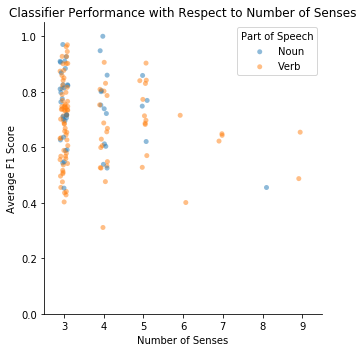

In [10]:
model_perf = pd.DataFrame(test_stats).merge(df, left_on ='word', right_on = 'Lemma')
plot = sns.catplot(x = 'num_senses', y = 'avg_f1', hue = 'pos', legend = False, data = model_perf, alpha = 0.5)
plt.ylim(0, 1.05)
plt.xlabel("Number of Senses")
plt.ylabel("Average F1 Score")
plt.title("Classifier Performance with Respect to Number of Senses")
plt.legend(["Noun", "Verb"], title = 'Part of Speech')
plt.tight_layout()
plt.savefig("../../results/figures/f1_num_senses.png")

In [11]:
model_perf['Part of Speech'] = model_perf['pos'].replace({'n': "Noun", 'v': 'Verb'})
model_perf

,word,avg_f1,avg_acc,Lemma,pos,entropy,num_senses,freq,Part of Speech
0,thing.n,0.457054,0.469521,thing.n,n,2.812869,8,264,Noun
1,meet.v,0.654408,0.650150,meet.v,v,2.774648,9,214,Verb
2,lead.v,0.622337,0.637241,lead.v,v,2.684982,7,170,Verb
3,serve.v,0.715248,0.716464,serve.v,v,2.359147,6,194,Verb
4,give.v,0.487120,0.495654,give.v,v,2.268538,9,704,Verb
...,...,...,...,...,...,...,...,...,...
141,believe.v,0.559066,0.565854,believe.v,v,0.889375,3,215,Verb
142,help.v,0.747203,0.769697,help.v,v,0.877312,3,226,Verb
143,expect.v,0.816213,0.837558,expect.v,v,0.816499,3,234,Verb
144,way.n,0.716721,0.725227,way.n,n,0.728521,3,269,Noun


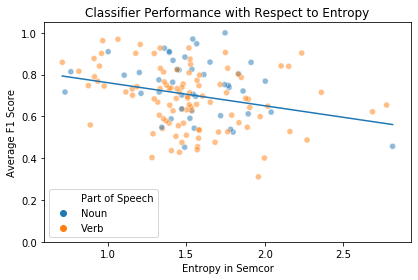

In [24]:
sns.scatterplot(x = 'entropy', y = 'avg_f1', hue = 'Part of Speech', data = model_perf, alpha = 0.5)
lm = LinearRegression()
x = model_perf['entropy'].values.reshape(-1, 1)
lm.fit(x, model_perf['avg_f1'])
y_pred = lm.predict(x)
plt.plot(x, y_pred, color = '')

plt.ylim(0, 1.05)
plt.xlabel("Entropy in Semcor")
plt.ylabel("Average F1 Score")
plt.title("Classifier Performance with Respect to Entropy in Semcor")
plt.tight_layout()

plt.title("Classifier Performance with Respect to Entropy")
plt.savefig("../../results/figures/f1_entropy.png")

## Top level information on Probe Performance

In [17]:
np.mean(model_perf['avg_f1']) #Average F1 Score

0.7034182039571342

In [14]:
model_perf.to_csv("../data/model_perf.csv")

In [15]:
import seaborn as sns

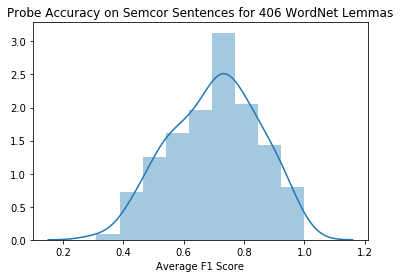

In [16]:
sns.distplot(model_perf['avg_f1'])
plt.xlabel("Average F1 Score")
plt.title("Probe Accuracy on Semcor Sentences for 406 WordNet Lemmas")
plt.savefig("../../results/figures/f1distplot.png")